In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/t6/rqpqvwf91xv69jhkp8bkvnsm0000gn/T/ipykernel_11600/2410089959.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('../DataSet/Global Superstore/Orders-Table.csv')

In [3]:
df.shape

(51290, 24)

In [4]:
df.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/12,7/31/12,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/13,2/7/13,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,10/17/13,10/18/13,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,1/28/13,1/30/13,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium


In [5]:
data=df.drop(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name', 'Postal Code', 'Product ID','Customer ID','Product Name','Ship Mode','Segment'], axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            51290 non-null  object 
 1   State           51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Market          51290 non-null  object 
 4   Region          51290 non-null  object 
 5   Category        51290 non-null  object 
 6   Sub-Category    51290 non-null  object 
 7   Sales           51290 non-null  float64
 8   Quantity        51290 non-null  int64  
 9   Discount        51290 non-null  float64
 10  Profit          51290 non-null  float64
 11  Shipping Cost   51290 non-null  float64
 12  Order Priority  51290 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 5.1+ MB


In [7]:
data

,City,State,Country,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,New York City,New York,United States,US,East,Technology,Accessories,2309.650,7,0.0,762.1845,933.57,Critical
1,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,3709.395,9,0.1,-288.7650,923.63,Critical
2,Brisbane,Queensland,Australia,APAC,Oceania,Technology,Phones,5175.171,9,0.1,919.9710,915.49,Medium
3,Berlin,Berlin,Germany,EU,Central,Technology,Phones,2892.510,5,0.1,-96.5400,910.16,Medium
4,Dakar,Dakar,Senegal,Africa,Africa,Technology,Copiers,2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Kure,Hiroshima,Japan,APAC,North Asia,Office Supplies,Fasteners,65.100,5,0.0,4.5000,0.01,Medium
51286,Houston,Texas,United States,US,Central,Office Supplies,Appliances,0.444,1,0.8,-1.1100,0.01,Medium
51287,Oxnard,California,United States,US,West,Office Supplies,Envelopes,22.920,3,0.0,11.2308,0.01,High
51288,Valinhos,São Paulo,Brazil,LATAM,South,Office Supplies,Binders,13.440,2,0.0,2.4000,0.00,Medium


In [8]:

data.dtypes

City               object
State              object
Country            object
Market             object
Region             object
Category           object
Sub-Category       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [9]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

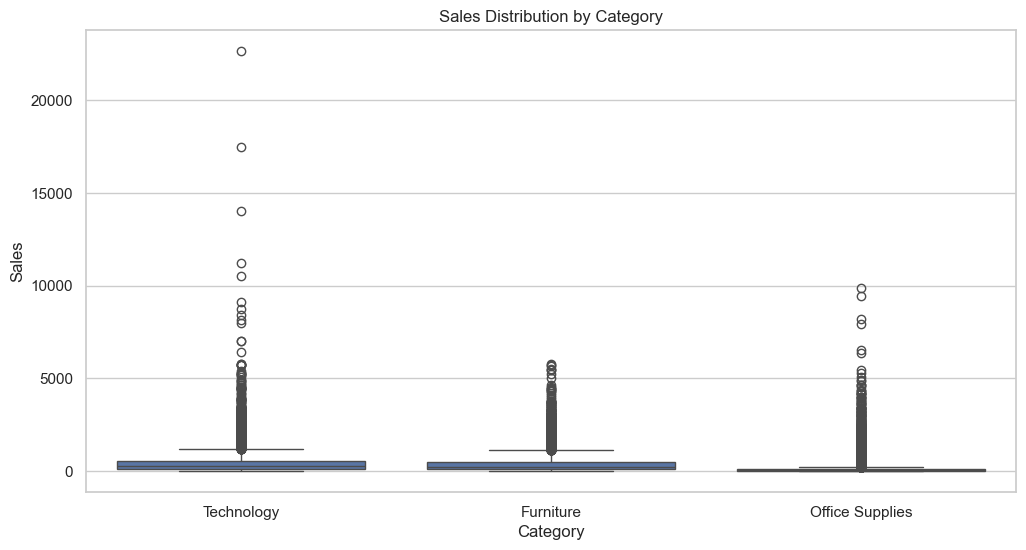

In [10]:
# Boxplot for Sales by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Sales', data=data)
plt.title('Sales Distribution by Category')
plt.show()



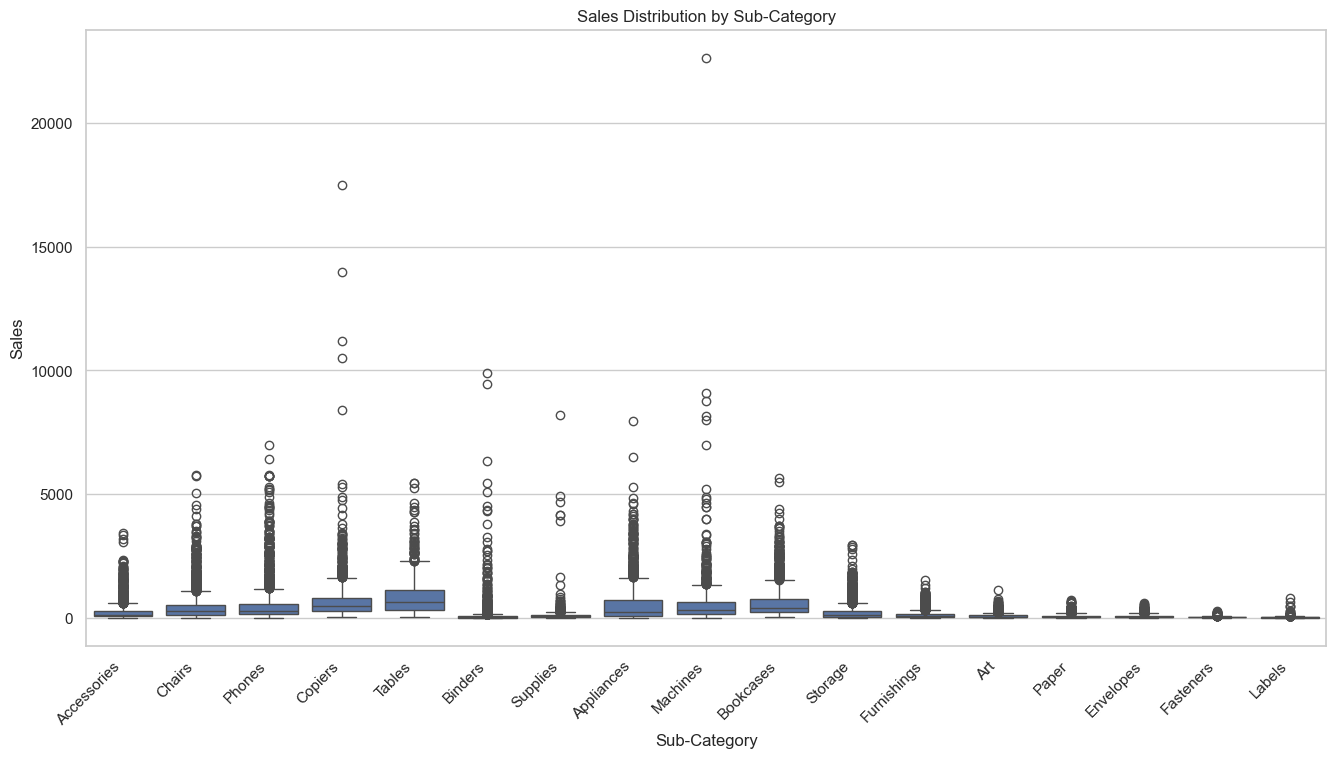

In [11]:
# Boxplot for Sales by Sub-Category
plt.figure(figsize=(16, 8))
sns.boxplot(x='Sub-Category', y='Sales', data=data)
plt.title('Sales Distribution by Sub-Category')
plt.xticks(rotation=45, ha='right')
plt.show()


/var/folders/t6/rqpqvwf91xv69jhkp8bkvnsm0000gn/T/ipykernel_11600/2966332413.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Sales', data=data, ci=None)


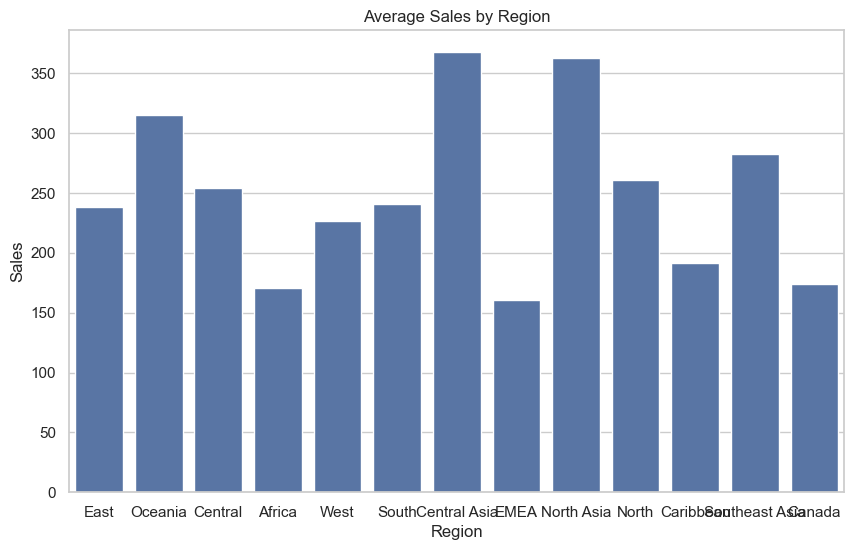

In [12]:
# Barplot for Sales by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=data, ci=None)
plt.title('Average Sales by Region')
plt.show()


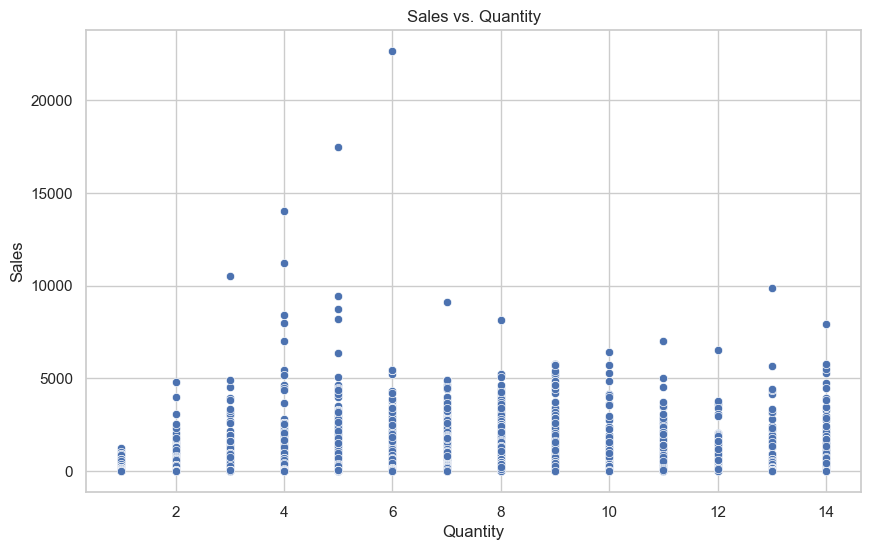

In [13]:
# Scatterplot for Sales vs. Quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Sales', data=data)
plt.title('Sales vs. Quantity')
plt.show()

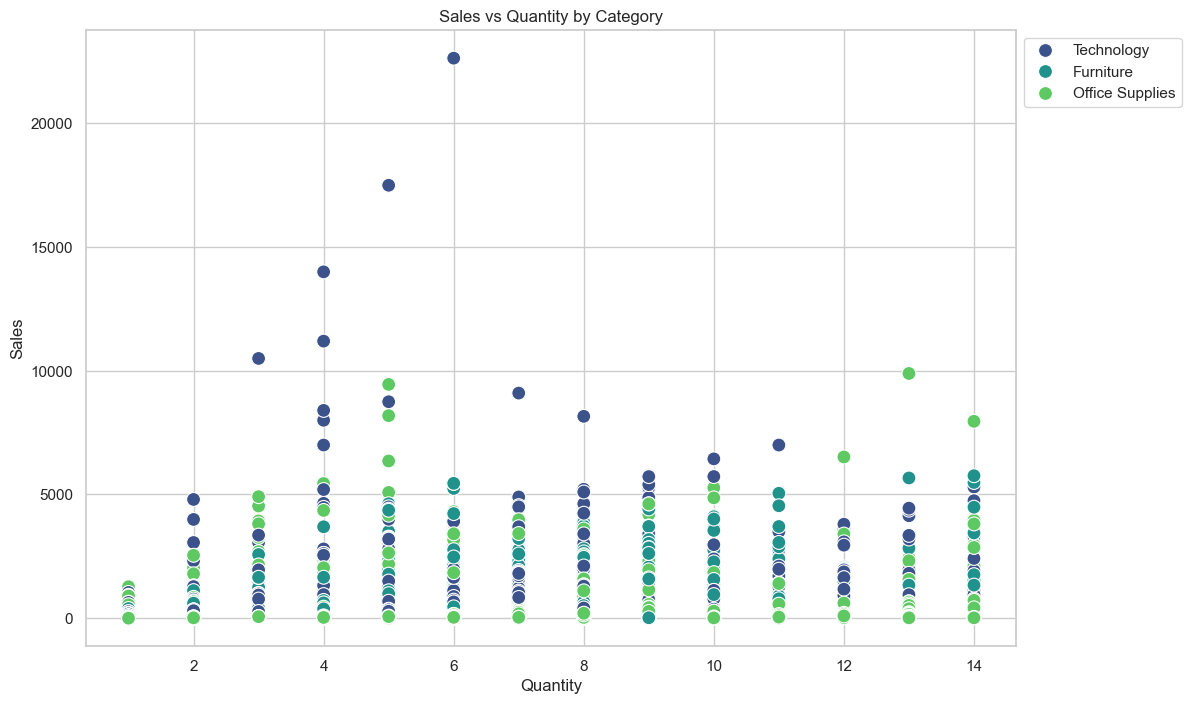

In [14]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Quantity', y='Sales', hue='Category', data=df, palette='viridis', s=100)
plt.title('Sales vs Quantity by Category')
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

## Modification of dataframe 

In [97]:
# Modifing the Category
category_mapping = {'Technology': 0, 'Furniture': 1, 'Office Supplies': 2}
df['Category'] = df['Category'].replace(category_mapping)

# Modifing the Market
market_mapping = {'US': 0, 'APAC': 1, 'EU': 2, 'Africa': 3, 'EMEA': 4, 'LATAM': 5, 'Canada': 6}
df['Market'] = df['Market'].replace(market_mapping)

Sub_Category_mapping = {'Accessories': 0, 'Chairs': 1, 'Phones': 2, 'Copiers': 3, 'Tables': 4, 'Binders': 5, 'Supplies': 6, 'Appliances': 7, 'Machines': 8, 'Bookcases': 9, 'Storage': 10, 'Furnishings': 11, 'Art': 12, 'Paper': 13, 'Envelopes': 14, 'Fasteners': 15, 'Labels': 16}
df['Sub-Category'] = df['Sub-Category'].replace(Sub_Category_mapping)


/var/folders/t6/rqpqvwf91xv69jhkp8bkvnsm0000gn/T/ipykernel_11600/581975986.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sub-Category'] = df['Sub-Category'].replace(Sub_Category_mapping)


In [98]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/12,7/31/12,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,0,0,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/13,2/7/13,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,1,1,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,10/17/13,10/18/13,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,0,2,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,1/28/13,1/30/13,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,0,2,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11/5/13,11/6/13,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,0,3,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,6/19/14,6/19/14,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,2,15,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,6/20/14,6/24/14,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,2,7,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,12/2/13,12/2/13,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,2,14,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,2/18/12,2/22/12,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,2,5,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


## Linear Regression:

- Simple and interpretable.
- Assumes a linear relationship between features and the target variable.

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression

In [99]:
# Select relevant features (X) and the target variable (y)
features = ['Quantity', 'Discount', 'Shipping Cost','Category','Sub-Category','Market']
target = 'Sales'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 76080.27268547879
R-squared: 0.6600490165584216


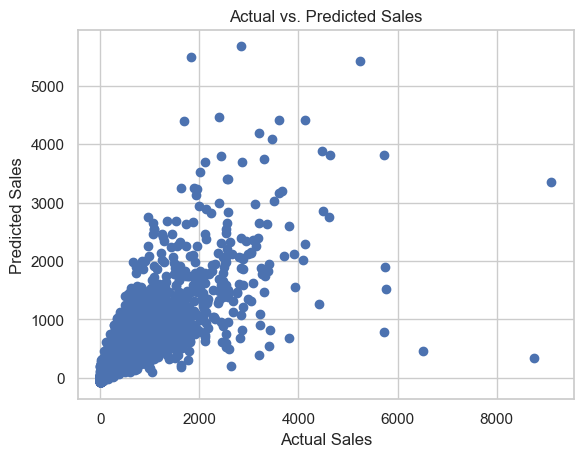

In [100]:
# Scatter plot for actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()


## Decision Trees:

- Non-linear model that can capture complex relationships.
- Prone to overfitting, so use with caution and consider ensemble methods.

In [44]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor

In [101]:
# Select relevant features (X) and the target variable (y)
features = ['Quantity', 'Discount', 'Shipping Cost','Category','Sub-Category','Market']
target = 'Sales'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regressor model
model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 106719.27770298935
R-squared: 0.5231441459563715


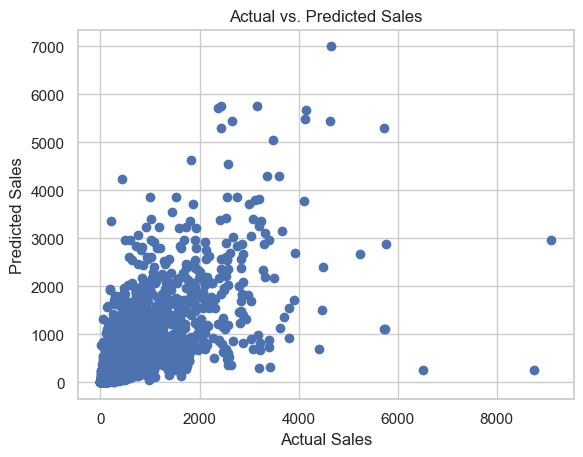

In [102]:
# Scatter plot for actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()

## Random Forest:

- Ensemble of decision trees that reduces overfitting compared to individual trees.
- Provides feature importance.

In [67]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

In [103]:
# Select relevant features (X) and the target variable (y)
features = ['Quantity', 'Discount', 'Shipping Cost','Category','Sub-Category','Market']
target = 'Sales'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 65889.29413018576
R-squared: 0.7055855670966422


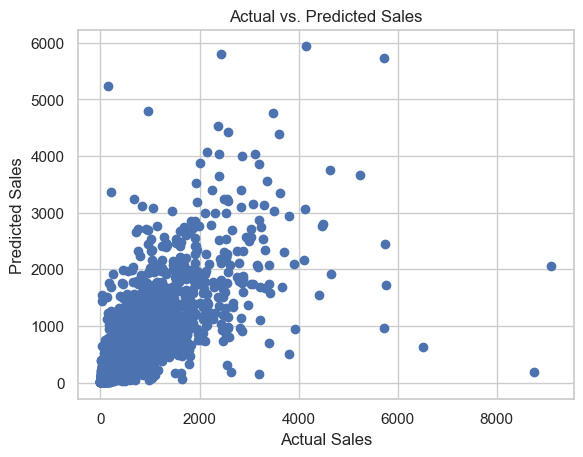

In [69]:
# Scatter plot for actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()

## Support Vector Machines (SVM):

- Effective for high-dimensional data.
- Good at capturing complex relationships.

In [70]:
# Import necessary libraries
from sklearn.svm import SVR

In [104]:
# Select relevant features (X) and the target variable (y)
features = ['Quantity', 'Discount', 'Shipping Cost','Category','Sub-Category','Market']
target = 'Sales'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a support vector machine model
# Using a radial basis function (RBF) kernel here, you may explore other kernels based on your data
model = SVR(kernel='rbf')

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Create a pipeline for scaling and fitting the model
pipeline = Pipeline([
    ('scaler', scaler),
    ('model', model)
])

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 144143.06553755407
R-squared: 0.355922696434707


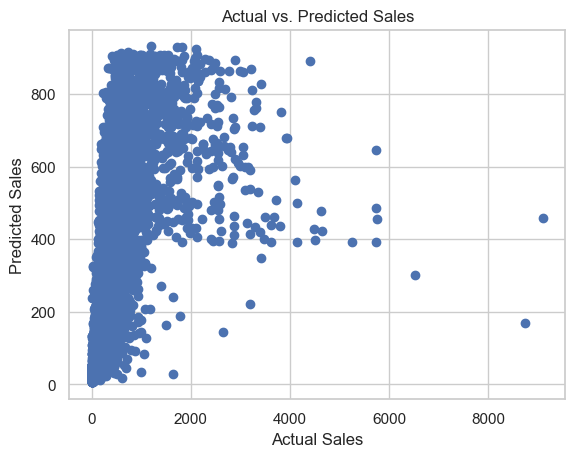

In [72]:
# Scatter plot for actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()

## K-Nearest Neighbors (KNN):
- Simple and intuitive.
- Can be computationally expensive for large datasets.

In [74]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsRegressor

In [105]:
# Select relevant features (X) and the target variable (y)
features = ['Quantity', 'Discount', 'Shipping Cost','Category','Sub-Category','Market']
target = 'Sales'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# It's often a good idea to scale features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose the number of neighbors (k)
k_neighbors = 5

# Create a KNN model
model = KNeighborsRegressor(n_neighbors=k_neighbors)

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 73450.37126175477
R-squared: 0.6718002569758345


# Gradient Boosting

- Builds a series of weak learners to create a strong predictive model.
- Robust and often achieves high performance.

In [93]:
t = df['Sub-Category'].unique()

In [94]:
j=0
dic={}
for i in t:
    dic[i]=j
    j+=1
print(dic)

{'Accessories': 0, 'Chairs': 1, 'Phones': 2, 'Copiers': 3, 'Tables': 4, 'Binders': 5, 'Supplies': 6, 'Appliances': 7, 'Machines': 8, 'Bookcases': 9, 'Storage': 10, 'Furnishings': 11, 'Art': 12, 'Paper': 13, 'Envelopes': 14, 'Fasteners': 15, 'Labels': 16}


<Axes: >

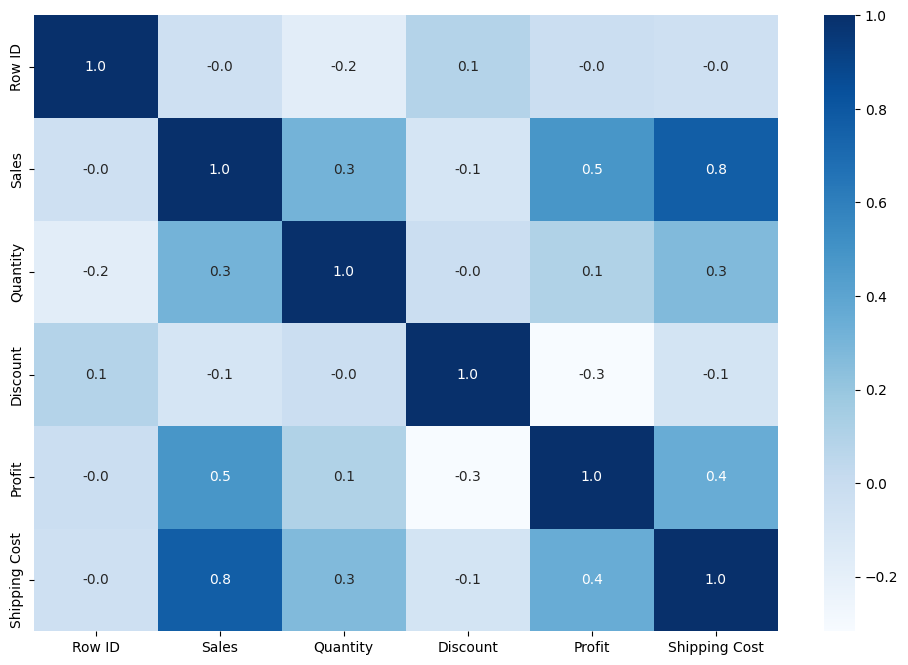